# Assignments for "Simple Linear Regression"

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the ["House Prices" dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) from Kaggle. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

**(1)** Investigate the data and do any necessary data cleaning.

**(2)** Explore the data and find some variables that you think would be useful in the prediction of the house prices.


**(3)** Build your initial model using these features and estimate the parameters using OLS.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train=pd.read_csv("train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train.corr()["SalePrice"].reset_index()

,index,SalePrice
0,Id,-0.021917
1,MSSubClass,-0.084284
2,LotFrontage,0.351799
3,LotArea,0.263843
4,OverallQual,0.790982
5,OverallCond,-0.077856
6,YearBuilt,0.522897
7,YearRemodAdd,0.507101
8,MasVnrArea,0.477493
9,BsmtFinSF1,0.386420


In [4]:
important_att = ["Id","OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]

In [5]:
train.drop(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish','GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'], axis =1, inplace = True)

In [6]:
test=pd.read_csv("test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
test.drop(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish','GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'], axis =1, inplace = True)

In [8]:
sample=pd.read_csv("sample_submission.csv")
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
Id              1460 non-null int64
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(12)
memory usage: 137.0 KB


In [10]:
train.describe()

,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,421.610009,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,365.750000,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,730.500000,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,1095.250000,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,1460.000000,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


In [11]:
def missing_value_table(df):
    missing_value = df.isnull().sum()
    missing_value_percent = 100 * df.isnull().sum() / len(df)
    missing_value_table = pd.concat([missing_value,missing_value_percent], axis = 1)
    missing_value_table_end = missing_value_table.rename(columns = {0 : 'Missing Value', 1 : '% değeri'})
    return missing_value_table_end

## TRAIN

In [12]:
train_m = missing_value_table(train)
train_m = pd.DataFrame(train_m)
pd.set_option("display.max_rows",81)
train_m

,Missing Value,% değeri
Id,0,0.0
OverallQual,0,0.0
YearBuilt,0,0.0
YearRemodAdd,0,0.0
TotalBsmtSF,0,0.0
1stFlrSF,0,0.0
GrLivArea,0,0.0
FullBath,0,0.0
TotRmsAbvGrd,0,0.0
GarageCars,0,0.0


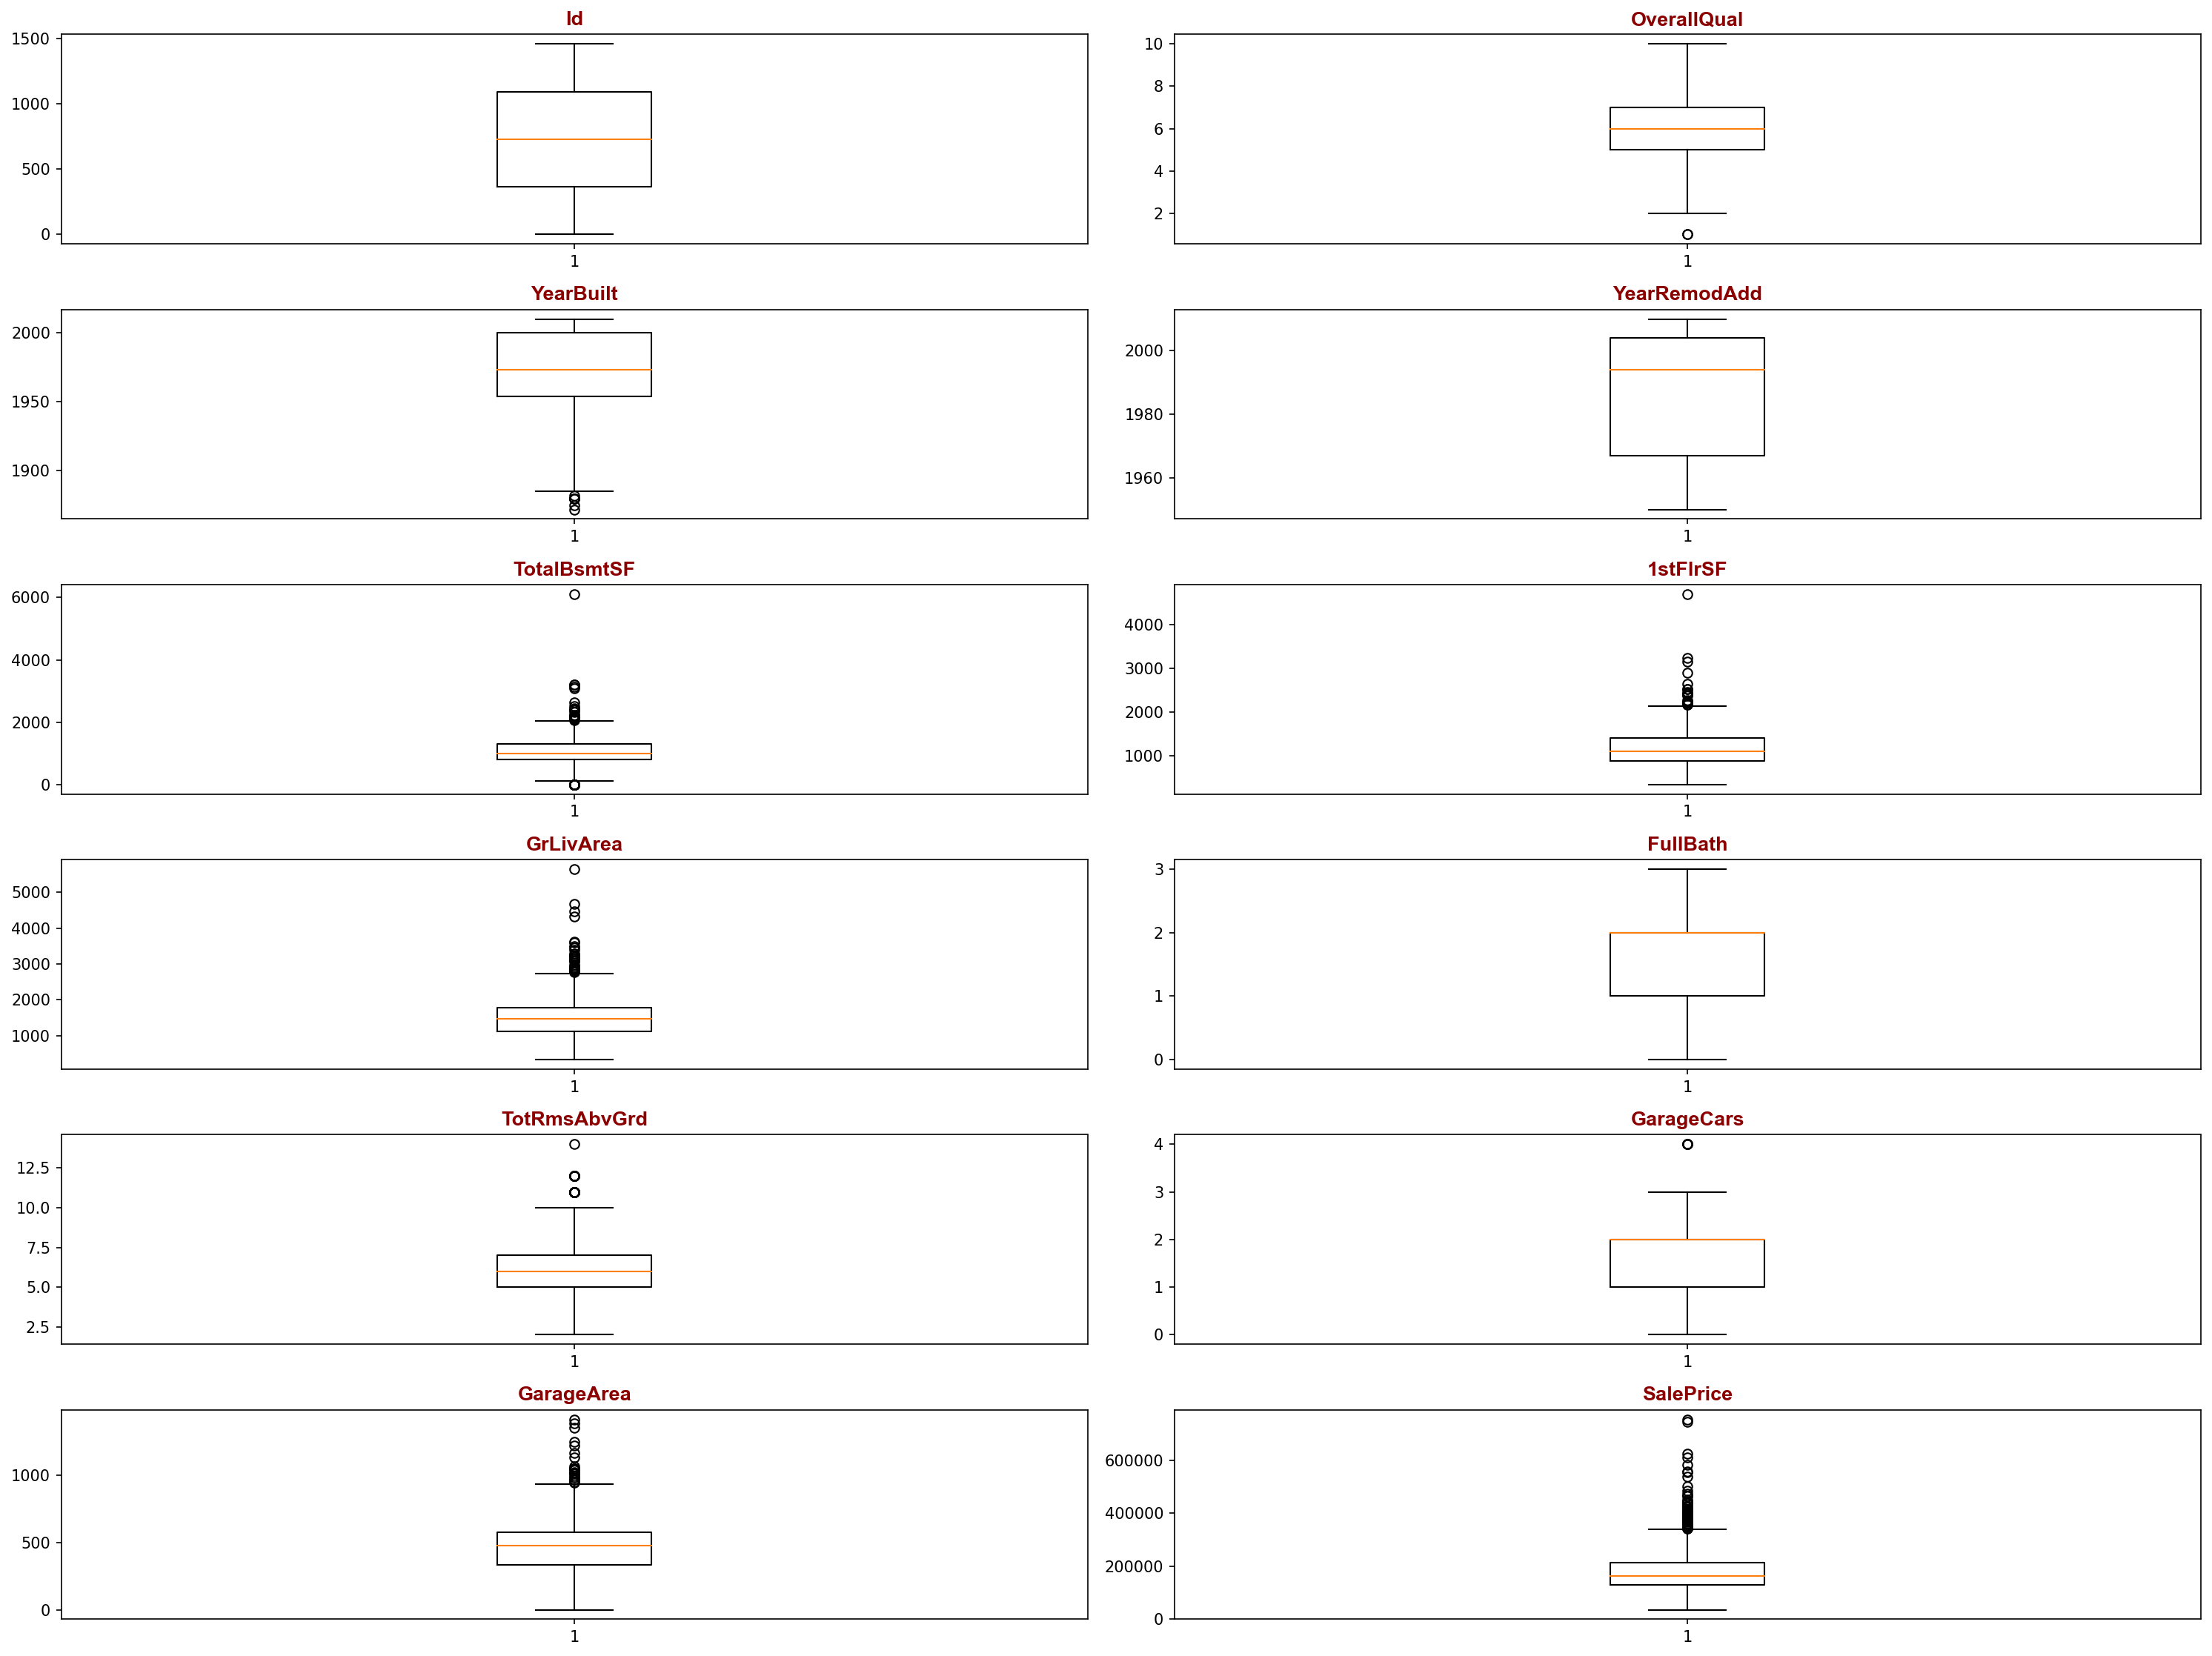

In [13]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,15),dpi=150)
for i,col in enumerate(train.columns):
    plt.subplot(6,2,i+1)
    plt.boxplot(col, data=train)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

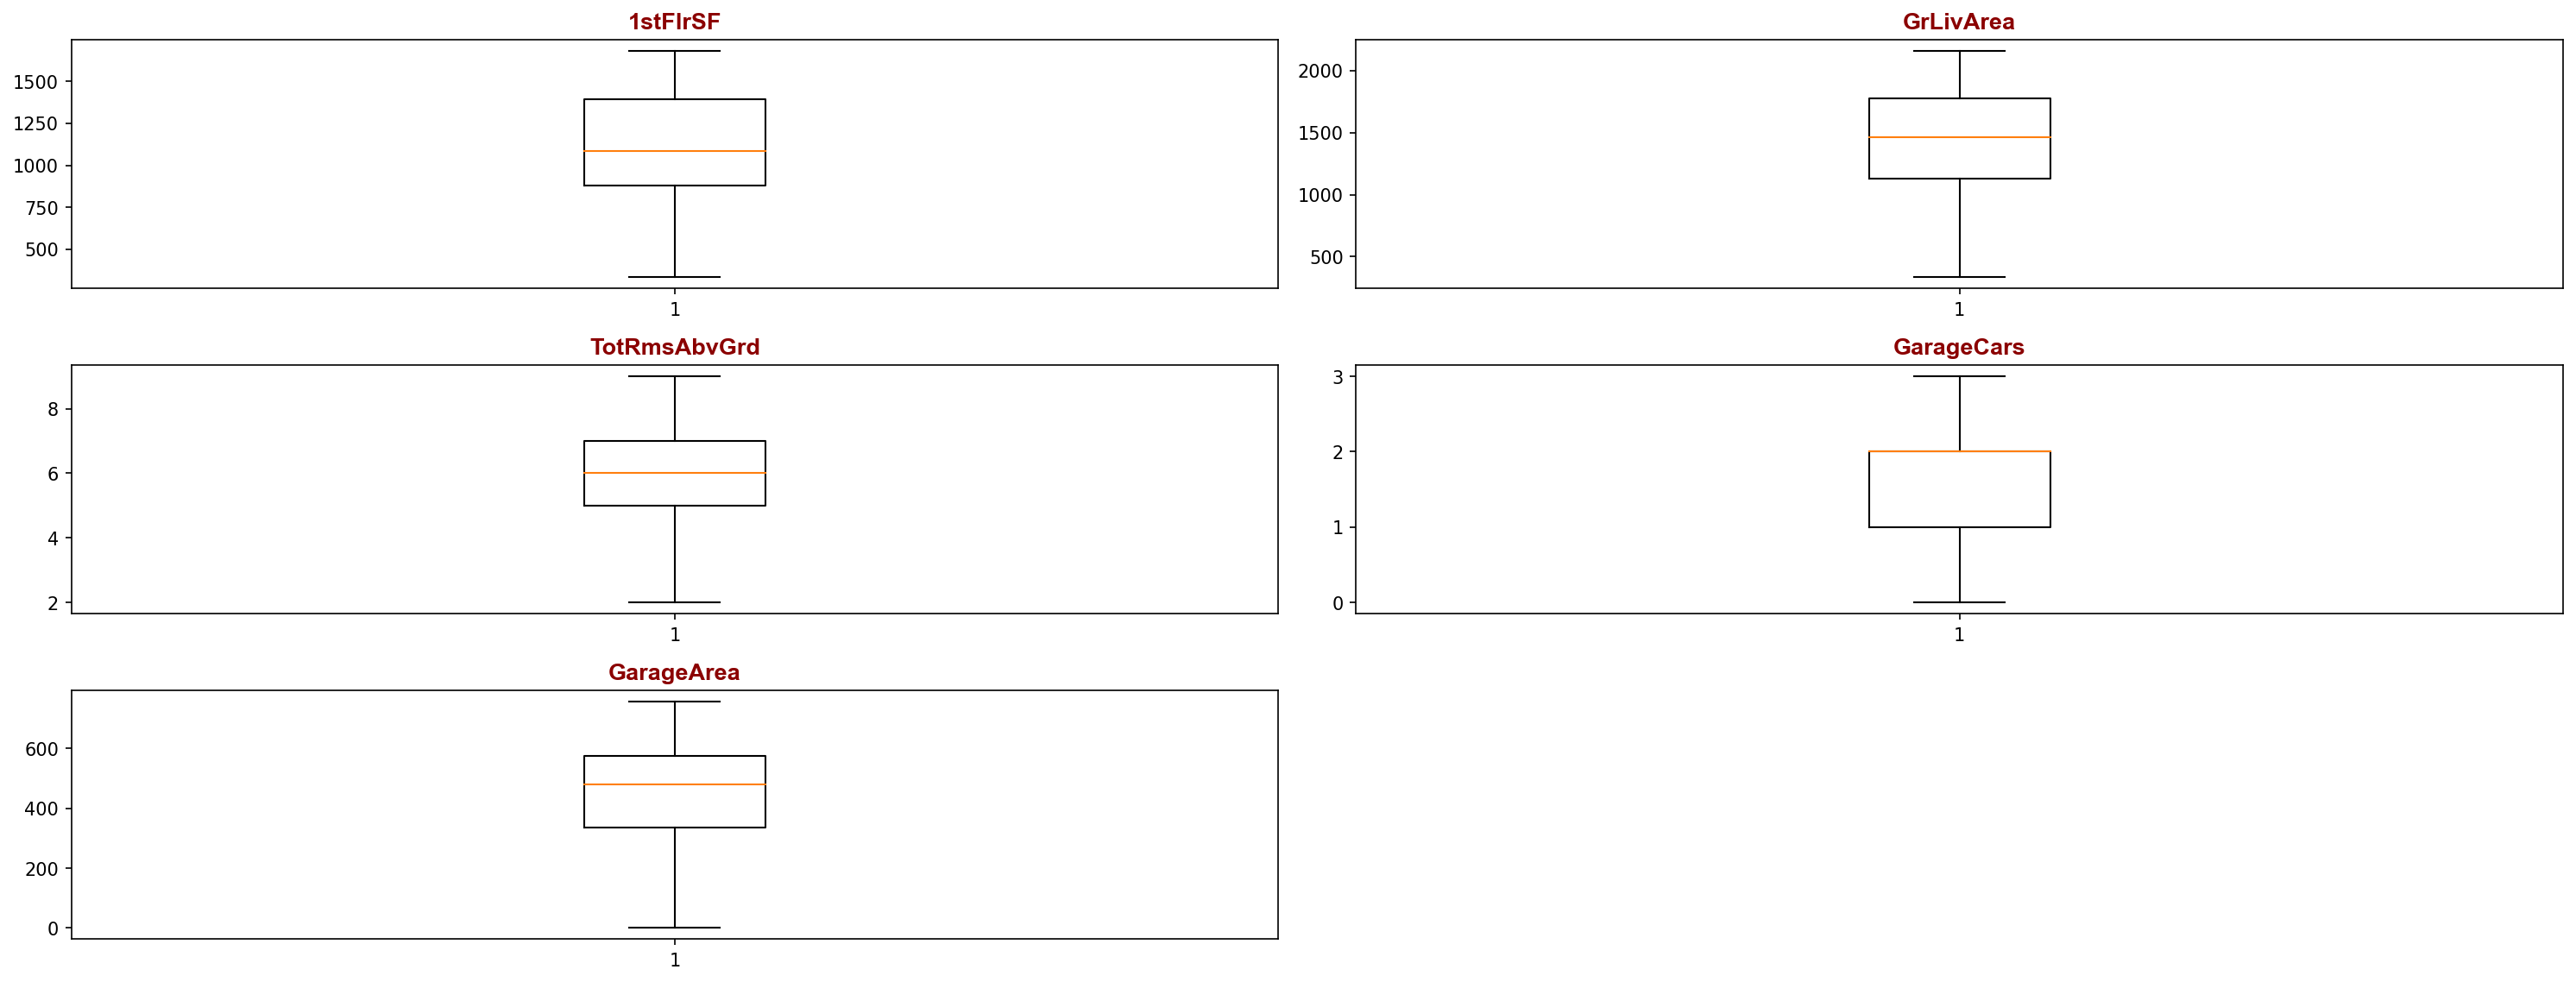

In [14]:
from scipy.stats.mstats import winsorize
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,15),dpi=150)
list2 = ["1stFlrSF","GrLivArea","TotRmsAbvGrd","GarageCars","GarageArea"]
for i,col in enumerate(list2):
    train[col] = winsorize(train[col], (0, 0.10))
    plt.subplot(6,2,i+1)
    plt.boxplot(train[col])
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

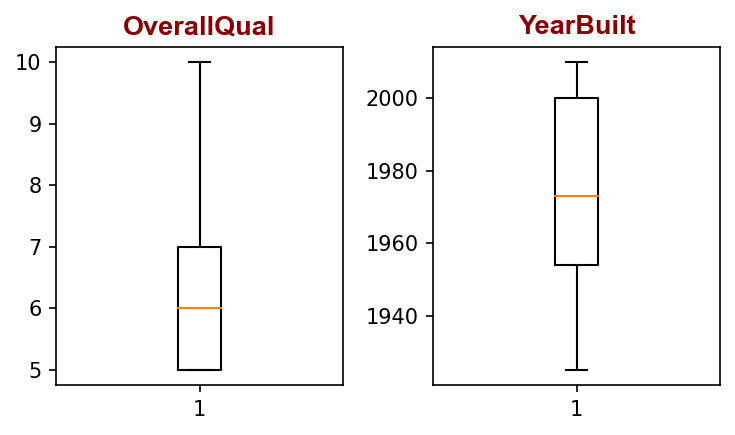

In [15]:
plt.figure(figsize=(5,3),dpi=150)
list4 = ["OverallQual","YearBuilt"]
for i,col in enumerate(list4):
    train[col] = winsorize(train[col], (0.10,0))
    plt.subplot(1,2,i+1)
    plt.boxplot(train[col])
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

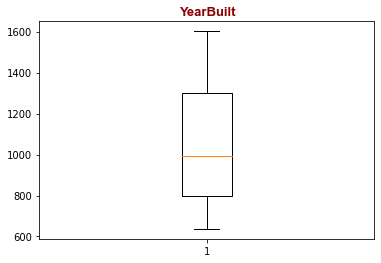

In [16]:
train["TotalBsmtSF"] = winsorize(train["TotalBsmtSF"], (0.10, 0.10))
plt.boxplot(train["TotalBsmtSF"])
plt.title(col, fontdict=baslik_font)
plt.show()   

## TEST

In [17]:
test_m = missing_value_table(test)
test_m = pd.DataFrame(test_m)
pd.set_option("display.max_rows",80)
test_m

,Missing Value,% değeri
Id,0,0.00000
OverallQual,0,0.00000
YearBuilt,0,0.00000
YearRemodAdd,0,0.00000
TotalBsmtSF,1,0.06854
1stFlrSF,0,0.00000
GrLivArea,0,0.00000
FullBath,0,0.00000
TotRmsAbvGrd,0,0.00000
GarageCars,1,0.06854


In [18]:
from sklearn.impute import SimpleImputer
list =["TotalBsmtSF","GarageCars","GarageArea"]
for i in list:
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    test[i] = imp_mean.fit_transform(test[[i]])

In [19]:
test.isna().sum()

Id              0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64

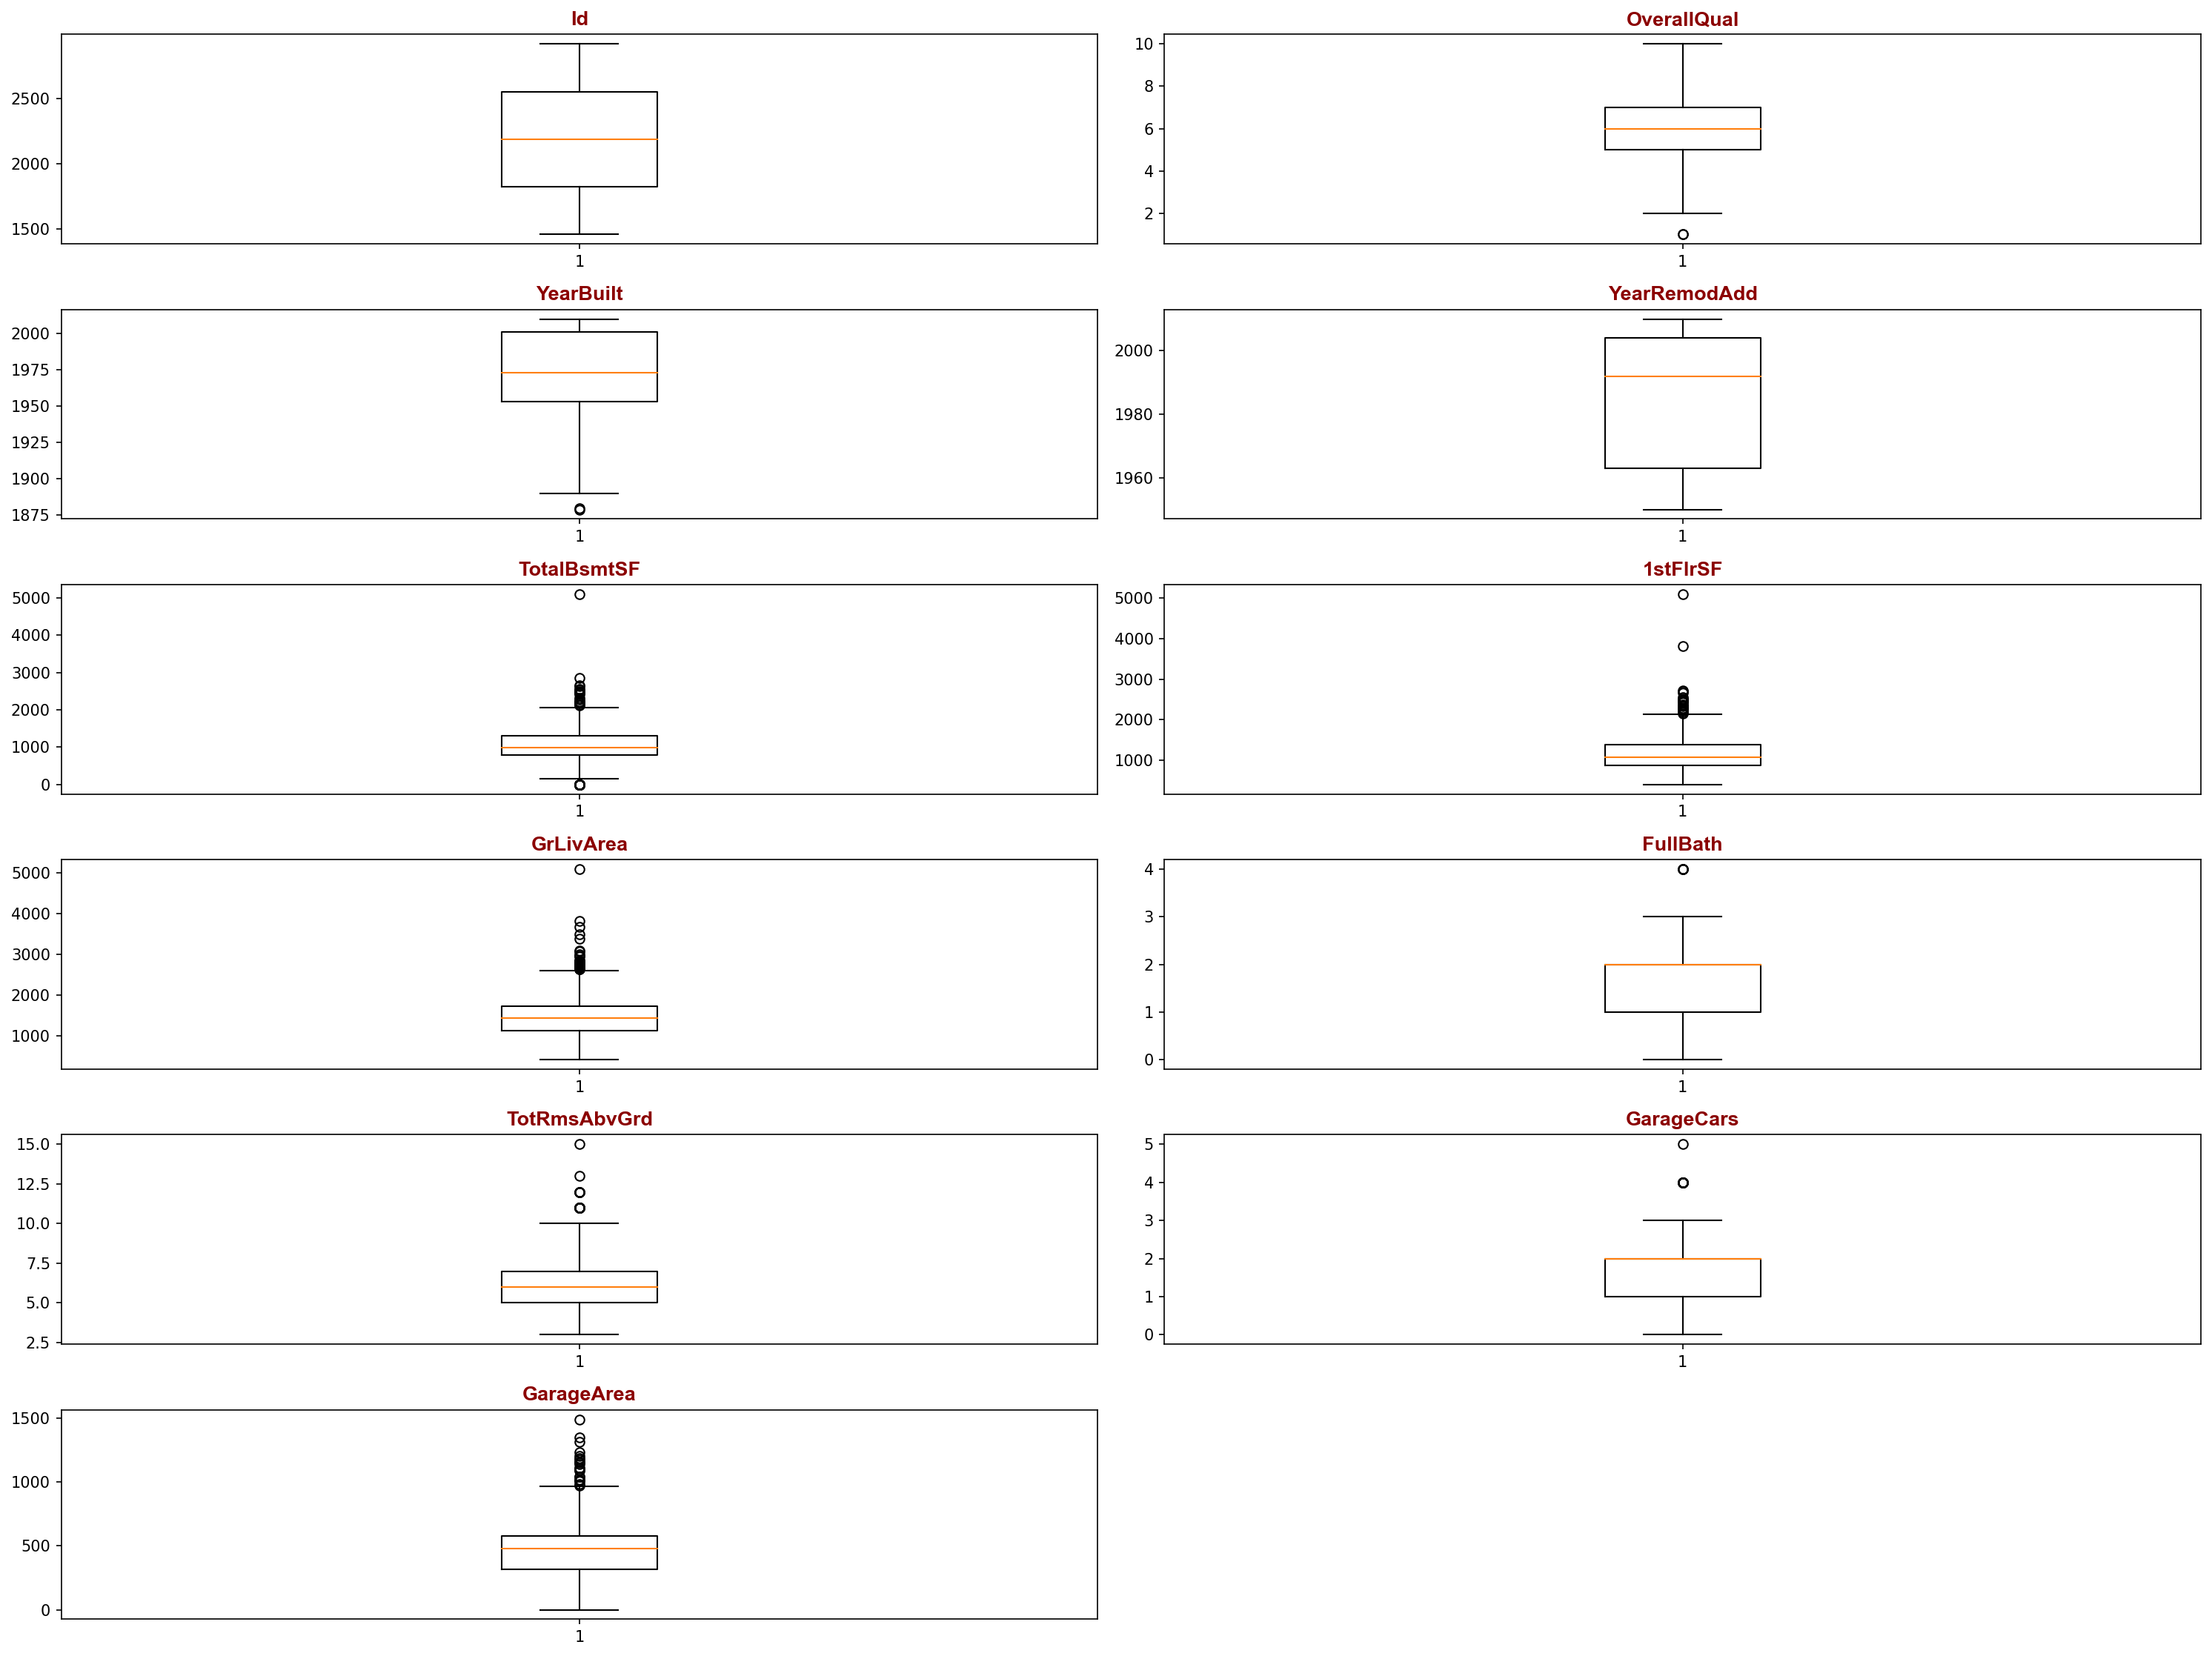

In [20]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,15),dpi=150)
for i,col in enumerate(test.columns):
    plt.subplot(6,2,i+1)
    plt.boxplot(col, data=test)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

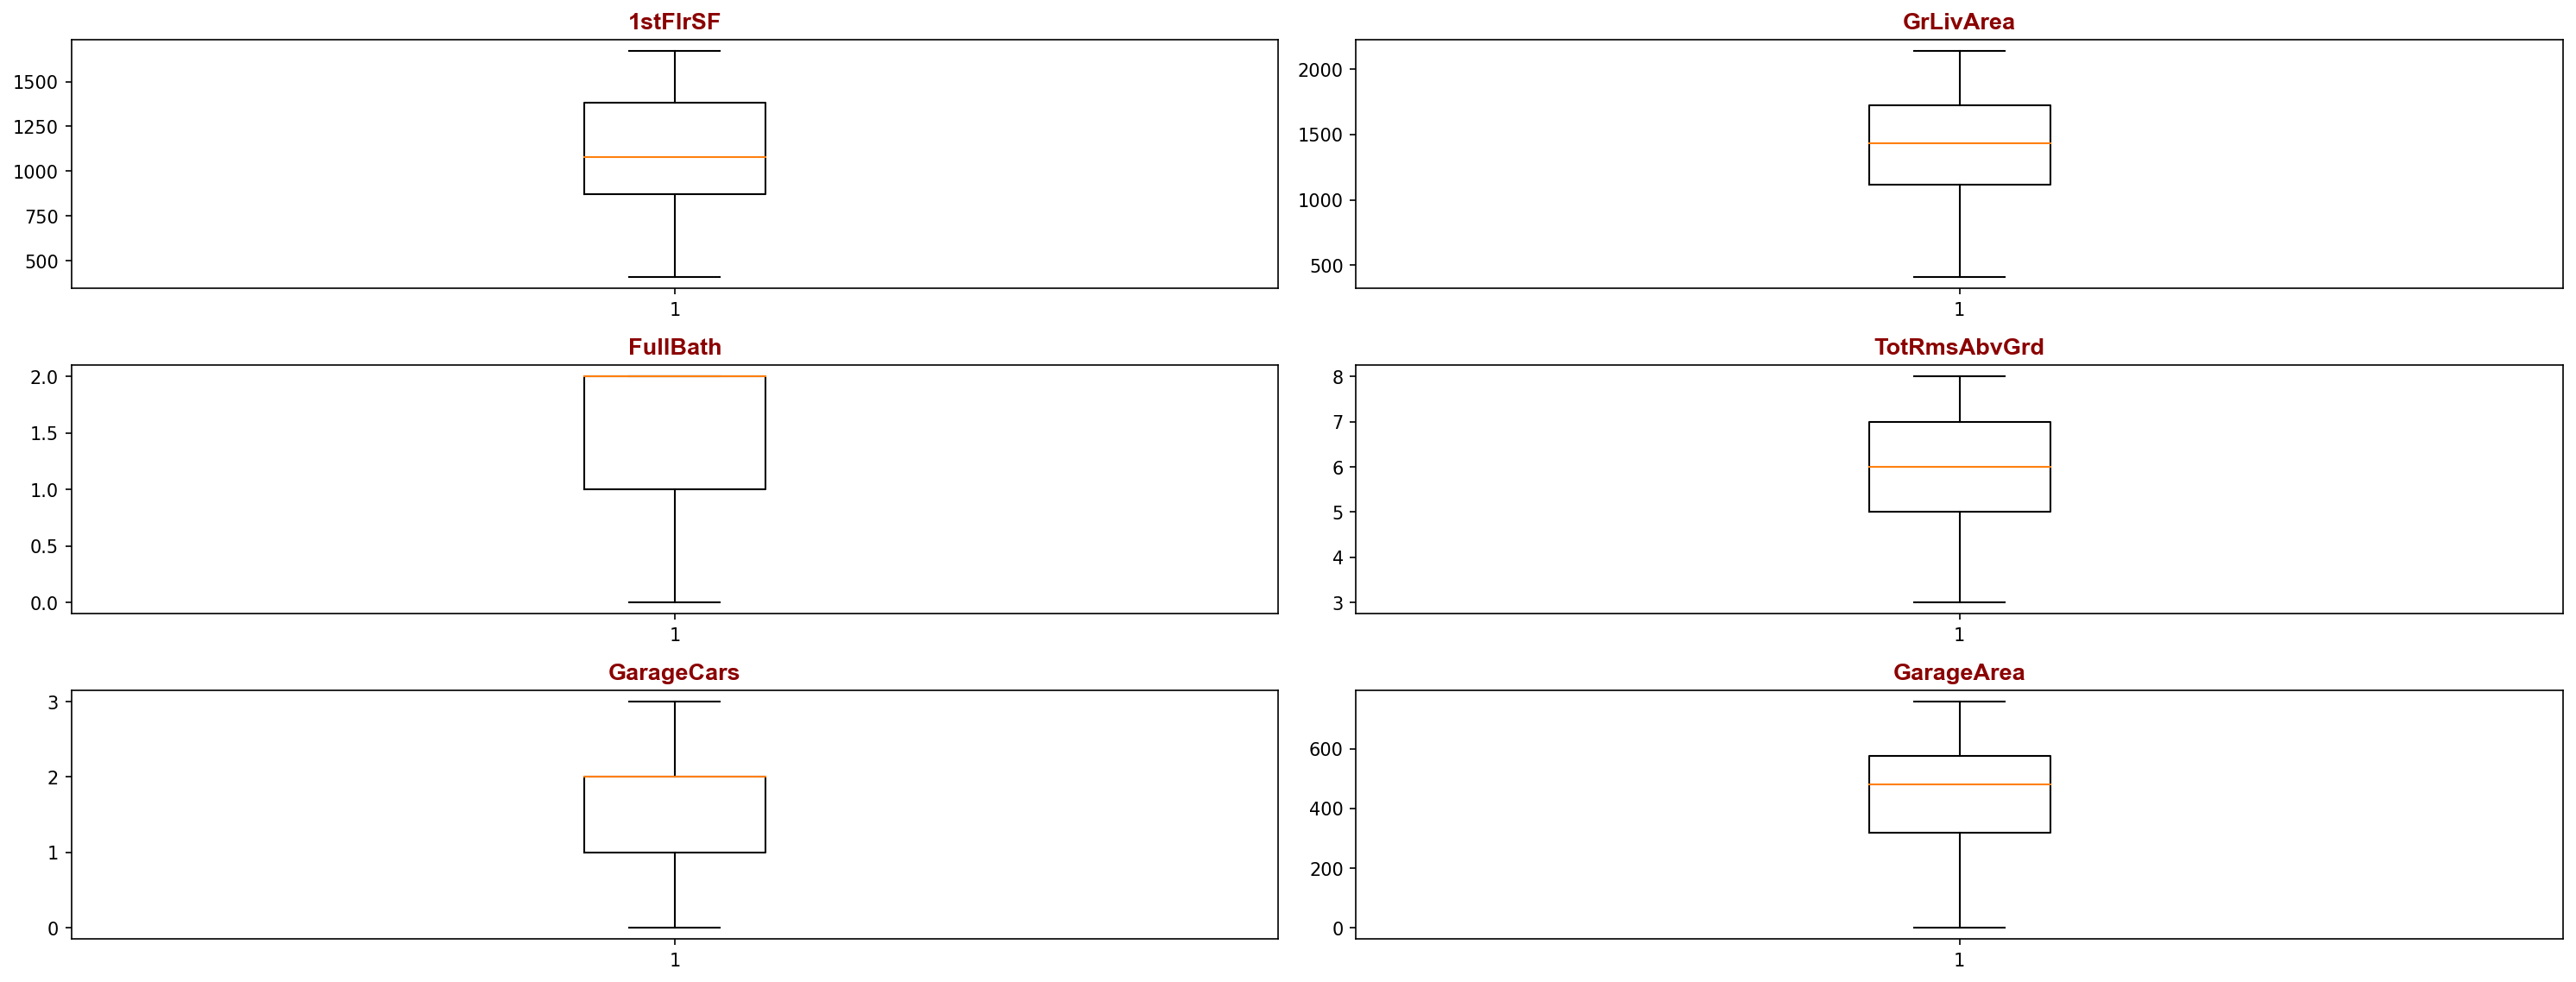

In [21]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(20,15),dpi=150)
list3 = ["1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]
for i,col in enumerate(list3):
    test[col] = winsorize(test[col], (0, 0.10))
    plt.subplot(6,2,i+1)
    plt.boxplot(test[col])
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

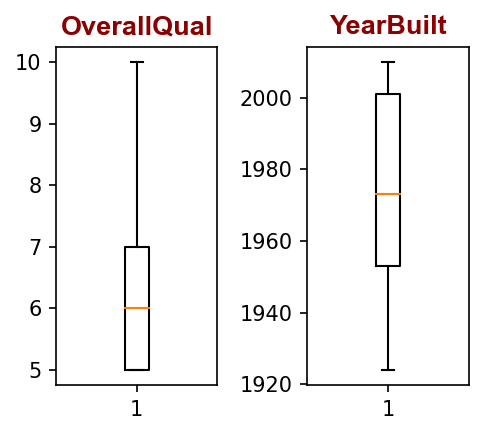

In [22]:
plt.figure(figsize=(5,3),dpi=150)
list5 = ["OverallQual","YearBuilt",]
for i,col in enumerate(list5):
    test[col] = winsorize(test[col], (0.10,0))
    plt.subplot(1,3,i+1)
    plt.boxplot(test[col])
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

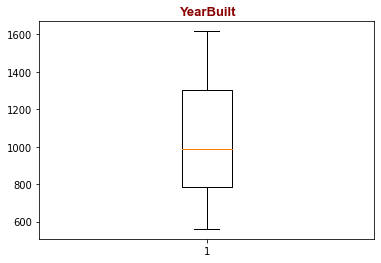

In [23]:
test["TotalBsmtSF"] = winsorize(test["TotalBsmtSF"], (0.10, 0.10))
plt.boxplot(test["TotalBsmtSF"])
plt.title(col, fontdict=baslik_font)
plt.show() 

In [24]:
from sklearn import linear_model
X = train[["OverallQual","YearBuilt","YearRemodAdd","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","GarageCars","GarageArea"]]
Y = train.SalePrice

lineer_model = linear_model.LinearRegression()
lineer_model.fit(X,Y)

print("Coefficents : {}".format(lineer_model.coef_))
print("\nIntercept : {}".format(lineer_model.intercept_))


import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

Coefficents : [ 2.77608061e+04  7.61044146e+01  3.10597000e+02  4.70351490e+01
  5.82681878e+00  4.56584059e+01 -4.61303920e+03  2.11334319e+03
  8.15296445e+03  2.30260116e+01]

Intercept : -913017.4161691939


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     481.0
Date:                Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:10:13   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -9.13e+05   1.31e+05     -6.962      0.000   -1.17e+06   -6.56e+05
OverallQual   2.776e+04   1326.618     20.926      0.000    2.52e+04    3.04e+04
YearBuilt       76.1044     58.448      1.302      0.193     -38.547     190.756
YearRemodAdd   310.5970     65.443      4.746      0.000     182.224     438.970
TotalBsmtSF     47.0351      6.886      6.831      0.000      33.528      60.542
1stFlrSF         5.8268      6.717      0.868      0.386      -7.348      19.002
GrLivArea       45.6584      5.226      8.736      0.000      35.407      55.910
FullBath     -4613.0392   2695.451     -1.711      0.087   -9900.443     674.364
TotRmsAbvGrd  2113.3432   1275.888      1.656      0.098    -389.443    4616.129
GarageCars    8152.9644   3366.689      2.422      0.016    1548.859    1.48e+04
GarageArea      23.0260     12.497      1.843      0.066      -1.488      47.540
==============================================================================
Omnibus:                      880.601   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25972.227
Skew:                           2.285   Prob(JB):                         0.00
Kurtosis:                      23.151   Cond. No.                     4.66e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""